Nombre: Hilda Beltrán

Matrícula: A01251916

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [3]:
# Carga el archivo bestsellers with categories.csv
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [4]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


In [41]:
# ANÁLISIS ESTADÍSTICO
# Verifica la cantidad de datos que tienes, las variables que contiene cada 
# vector de datos e identifica el tipo de variables.
df.info()
# Cantidad de datos: 550
# Variables que contiene: No nulo
# Tipo de variables: columna Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
 7   Grupo        550 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 34.5+ KB


In [16]:
# Analiza las variables para saber que representa cada una y en que rangos 
# se encuentran. Si la descripción del problema no te lo indica, utiliza el 
# máximo y el mínimo para encontrarlo.
df.describe()
# Cantidad de datos por columna: 550

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [60]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
Grupo             2.0
dtype: float64

In [13]:
# Rango por columna:
ruser = df['User Rating'].max() - df['User Rating'].min()
rrev = df['Reviews'].max() - df['Reviews'].min()
rprice = df['Price'].max() - df['Price'].min()
ryear = df['Year'].max() - df['Year'].min()

print('User Rating: {} \nReviews: {} \nPrice: {} \nYear: {}'.format(ruser, rrev, rprice, ryear))

User Rating: 1.6000000000000005 
Reviews: 87804 
Price: 105 
Year: 10


In [42]:
# Basándote en la media, mediana y desviación estándar de cada variable, 
# ¿qué conclusiones puedes entregar de los datos?

# La media en User Rating es de 4.6183, con esto podemos conocer que nuestra 
# media se encuentra dentro del 25 al 50% de nuestros datos. La media de Reviews
# se encuentra dentro del 50 al 75%, ya que es 11953.28. La media es de 13.1 y
# se encuentra dentro del 50 al 75% en Price.

# La mediana nos sirve para conocer el dato ubicado en la mitad de nuestro
# set de datos.

# La desviación estándar es de 0.227, lo cual nos indica que los datos no están
# tan dispersos, ya que se encuentran cerca de la media en User Ratings.
# La desviación estándar de Reviews es de 11731.13, lo cual quiere decir que los
# datos están muy dispersos con respecto a la media.
# La desviación estándar de Price es de 13.1, lo cual nos dice la dispersión que 
# tienen los datos.

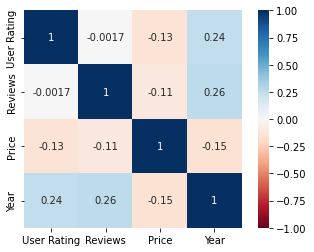

In [14]:
# Calcula la correlación de las variables que consideres relevantes.
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

In [17]:
# ¿Cuáles son las variables relevantes e irrelevantes para el análisis?

# Las variables relevantes para el análisis son los datos numéricos sin incluir
# el año de publicación, esto se debe a que solo queremos evaluar aspectos 
# relacionados con las críticas de los mismos.

# Las variables irrelevantes en este análisis son el Nombre, Autor, Año y
# Género, ya que son variables cualitativas que no estamos buscando evaluar.

In [43]:
# ANÁLISIS GRÁFICO

In [44]:
# ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar 
# variables, ¿cuáles quitarías y por qué?

# Si tuviera que eliminar variables, eliminaría la de año de publicación, y 
# precio, ya que no influyen en la crítica que se recibe por parte del usuario.

In [45]:
# ¿Existen variables que tengan datos extraños?

# No hay variables con datos extraños en nuestra información.

In [46]:
# Si comparas las variables, ¿todas están en rangos similares? 
# ¿Crees que esto afecte?

# 

In [47]:
# ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

# User Rating y Reviews

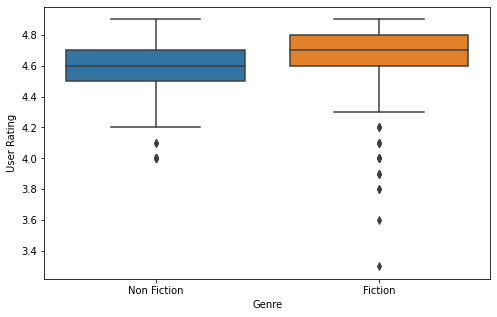

In [21]:
# 1 gráfico de caja (boxplot)
fig1 = plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'Genre', y ='User Rating')

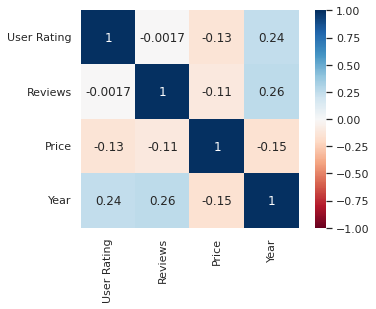

In [48]:
# 1 mapa de calor
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

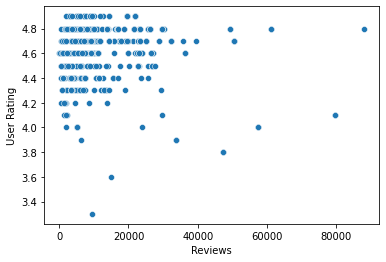

In [24]:
# 1 gráfico de dispersión
fig2 = plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x ='Reviews', y='User Rating')

In [61]:
# Describe brevemente las conclusiones que se pueden obtener con las gráficas.

# La gráfica de caja nos dice que los de ficción tienen mejor evaluación, con 
# datos dispersos.

# El mapa de color, con el Género y la calificación del usuario, nos muestra 
# que hay poca desviación en los datos.

# La gráfica de dispersión nos dice que entre más reviews se tengan, mayor
# rating se puede tener.

In [27]:
# CLUSTERING
numeric_cols = ['User Rating', 'Reviews',	'Price', 'Year']
X = df.loc[:, numeric_cols]
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price,Year
0,0.359990,0.460453,-0.470810,0.632456
1,-0.080978,-0.844786,0.821609,-0.948683
2,0.359990,0.599440,0.175400,1.264911
3,0.359990,0.808050,-0.655441,0.948683
4,0.800958,-0.365880,-0.101547,1.581139


Text(0.5, 1.0, 'Silhouette Score')

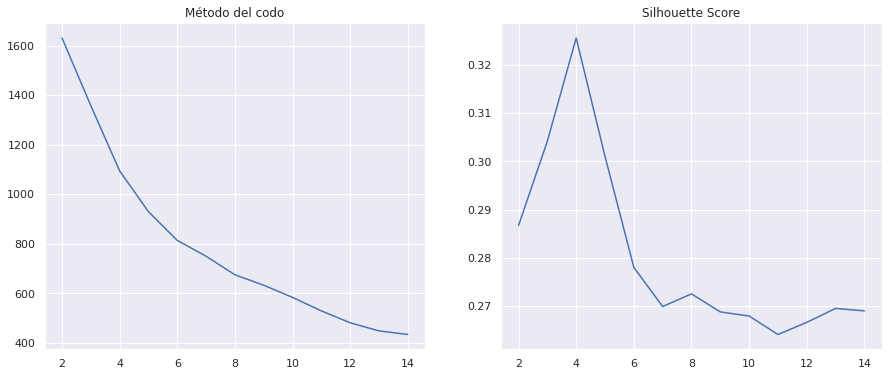

In [55]:
# Determina un valor de k
kmax   = 15
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

# Se puede observar que una buena k es de 4, para esto son 4 grupos los que 
# vamos a evaluar

In [53]:
# Calcula los centros de los grupos resultantes del algoritmo k-means
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,3
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,3
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,3
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,3


Text(0.5, 1.05, '4 grupos de clientes')

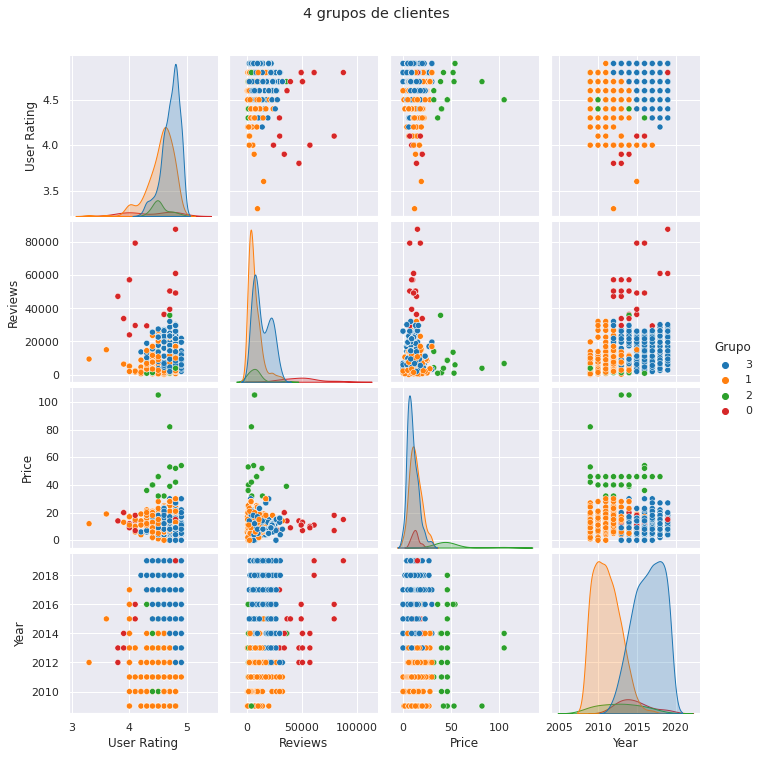

In [56]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de clientes', y=1.05)

In [57]:
fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    title='4 grupos de clientes',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()

In [59]:
df.groupby('Grupo').mean()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.362500,49948.125000,12.375000,2014.666667
1,4.537991,6761.358079,12.890830,2011.109170
2,4.538462,7219.538462,49.692308,2012.846154
3,4.716605,13429.856089,9.830258,2016.494465


In [58]:
df.groupby('Grupo').std()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,0.386526,16298.067795,3.597251,2.057154
1,0.232827,6336.908897,6.247902,1.665268
2,0.144435,6978.798305,18.750508,2.693582
3,0.150742,7952.964282,5.714242,1.869583


In [ ]:
# ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

# Sí, prque se utilizó un valor de k óptimo, por medio del método Silhouette 
# Score, se utilizó el promedio de estos valores para el centro.

In [ ]:
# ¿Cómo obtuviste el valor de k a usar?

# Se obtuvo poniendo un valor a kmax para poder encontrar el pico en el método
# de Silhouette Score, el cual es k = 4.

In [ ]:
# ¿Los centros serían más representativos si usaras un valor más alto? 
# ¿Más bajo?

# Si usáramos un valor más alto de k, los centros serían menos representativos
# de los datos, ya que serían menos datos dentro del cluster y habría menos
# distorsión de los datos. Al utilizar un valor más bajo de k sería lo contrario.

In [ ]:
# ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de 
# cajas y bigotes?

# Si tuviéramos muchos outliers en el análisis de cajas y bigotes, tendríamos
# una mayor dispersión en los datos que nos muestra el gráfico.

In [63]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.

model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)
df['Grupo'] = clusters.astype('str')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,3
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,3
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,3
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,3


Text(0.5, 1.05, '4 grupos de clientes')

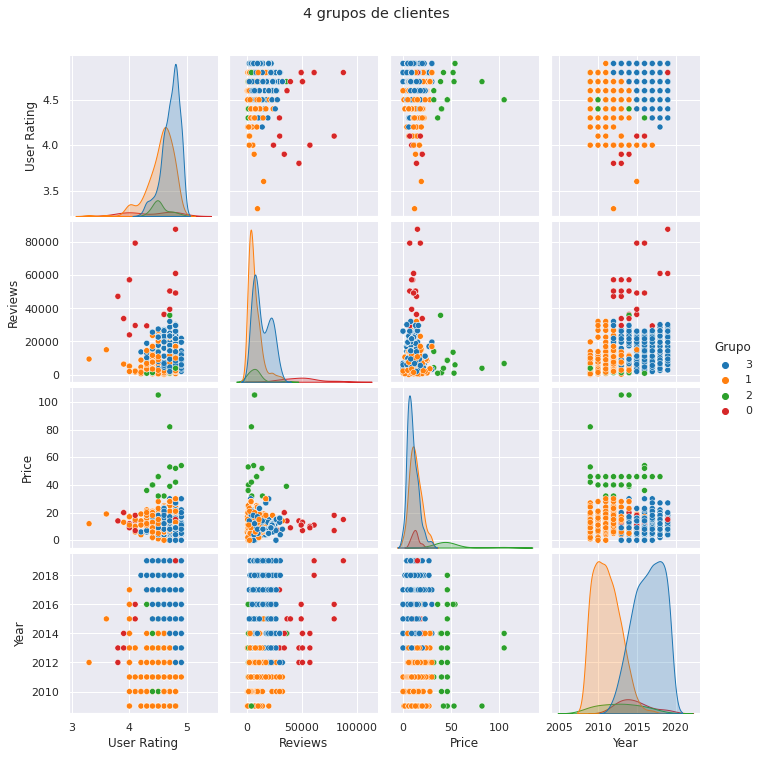

In [64]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de clientes', y=1.05)